In [1]:
import pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from csv import writer
from collections import deque
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

2023-07-24 15:09:38.610261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 15:09:41.756493: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-24 15:09:41.756566: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-24 15:09:56.412802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [34]:
cam=input("Enter camera angle (side/front) :")    # side / front
name_list=['chathura','hasitha','yohan','ravindu','geemanthi','jayasanka','derek','nirmana','dasith','bimsara']

Enter camera angle (side/front) :side


In [48]:
df_vector=pd.DataFrame()
df_vector_test=pd.DataFrame()
for name in name_list:
    print(name)
    idx=name_list.index(name)
    # create an empty dataframe to store the combined data
    combined_df_3_vids = pd.DataFrame()
    last_cycles=pd.DataFrame()
    
    for vid_no in range(1,4):
        print(vid_no)
        if cam=="side":
            print(cam)
            temp_r = open('feature_vector/{}/right/FV_{}_{}.pkl'.format(cam,name,vid_no), 'rb')
            temp_l = open('feature_vector/{}/left/FV_{}_{}.pkl'.format(cam,name,vid_no), 'rb')
            cycle=3
        
        if cam=="front":
            print(cam)
            temp_r = open('feature_vector/{}/front/FV_{}_{}.pkl'.format(cam,name,vid_no), 'rb')
            temp_l = open('feature_vector/{}/back/FV_{}_{}.pkl'.format(cam,name,vid_no), 'rb')
            cycle=1
        
        
        if vid_no==3:
            # Assuming your DataFrame is called df
            df_FV_person_r=pickle.load(temp_r)
            print('df_FV_person_r size',df_FV_person_r.shape)
            df_FV_person_l=pickle.load(temp_l)
            last_cycles = df_FV_person_r.tail(cycle)  # Get the last 3 rows
            print('last_cycles shape',last_cycles.shape)
            df_FV_person_r = df_FV_person_r.iloc[:-cycle]
            combined_df_3_vids = pd.concat([combined_df_3_vids, df_FV_person_r])
            combined_df_3_vids = pd.concat([combined_df_3_vids, df_FV_person_l])
            temp_r.close()
            temp_l.close()
            
        else:
            df_FV_person_r=pickle.load(temp_r)
            df_FV_person_l=pickle.load(temp_l)
            combined_df_3_vids = pd.concat([combined_df_3_vids, df_FV_person_r])
            combined_df_3_vids = pd.concat([combined_df_3_vids, df_FV_person_l])
            temp_r.close()
            temp_l.close()
            
    combined_df_3_vids = combined_df_3_vids.assign(Label=idx)
    last_cycles=last_cycles.assign(Label=idx)
    
    
    
    df_vector = pd.concat([df_vector, combined_df_3_vids])
    df_vector_test = pd.concat([df_vector_test, last_cycles])

    
df_feature_vector=df_vector.reset_index()
df_feature_vector_test=df_vector_test.reset_index()

df=df_feature_vector.iloc[:, 1:]
df_test=df_feature_vector_test.iloc[:, 1:]

df_input=df.drop(df.iloc[: , -1:], axis=1)
df_input_test=df_test.drop(df.iloc[: , -1:], axis=1)
    

chathura
1
side
2
side
3
side
df_FV_person_r size (6, 57)
last_cycles shape (3, 57)
hasitha
1
side
2
side
3
side
df_FV_person_r size (4, 57)
last_cycles shape (3, 57)
yohan
1
side
2
side
3
side
df_FV_person_r size (6, 57)
last_cycles shape (3, 57)
ravindu
1
side
2
side
3
side
df_FV_person_r size (5, 57)
last_cycles shape (3, 57)
geemanthi
1
side
2
side
3
side
df_FV_person_r size (3, 57)
last_cycles shape (3, 57)
jayasanka
1
side
2
side
3
side
df_FV_person_r size (4, 57)
last_cycles shape (3, 57)
derek
1
side
2
side
3
side
df_FV_person_r size (6, 57)
last_cycles shape (3, 57)
nirmana
1
side
2
side
3
side
df_FV_person_r size (6, 57)
last_cycles shape (3, 57)
dasith
1
side
2
side
3
side
df_FV_person_r size (5, 57)
last_cycles shape (3, 57)
bimsara
1
side
2
side
3
side
df_FV_person_r size (5, 57)
last_cycles shape (3, 57)


In [49]:
df_input

time  lower_body_left_avg  lower_body_right_avg  upper_arm_left_avg  \
0    1.900000             1.349872              1.338067            0.524864   
1    2.433333             1.250626              1.351073            0.519489   
2    3.000000             1.311683              1.296826            0.535490   
3    3.566667             1.270731              1.361292            0.537342   
4    4.133333             1.373674              1.308752            0.537279   
..        ...                  ...                   ...                 ...   
243  1.900000             1.355585              1.227235            0.546988   
244  2.500000             1.324924              1.305460            0.530298   
245  3.033333             1.313527              1.186623            0.529972   
246  3.600000             1.240589              1.239104            0.541968   
247  4.100000             1.282100              1.165712            0.511970   

     upper_arm_right_avg  lower_arm_left_avg  lower_arm_right_avg  \
0               0.547882            0.412736             0.469015   
1               0.560115            0.396591             0.471024   
2               0.568994            0.408922             0.448197   
3               0.581611            0.409023             0.467527   
4               0.577734            0.428199             0.453526   
..                   ...                 ...                  ...   
243             0.503946            0.454412             0.377424   
244             0.520400            0.498649             0.421201   
245             0.493650            0.433563             0.380265   
246             0.507766            0.436374             0.385113   
247             0.490796            0.381701             0.431177   

     arm_left_avg  arm_right_avg  thigh_left_avg  ...  visi_hakl   visi_ta  \
0        0.287622       0.308269        0.680591  ...   0.755263  0.725272   
1        0.282546       0.307139        0.625606  ...   0.861938  0.702672   
2        0.285756       0.312202        0.666803  ...   0.737979  0.684779   
3        0.282937       0.308731        0.642989  ...   0.872758  0.674034   
4        0.293978       0.314575        0.673533  ...   0.761539  0.696881   
..            ...            ...             ...  ...        ...       ...   
243      0.326227       0.291466        0.695342  ...   0.989358  0.879035   
244      0.333430       0.313876        0.683356  ...   0.995691  0.773331   
245      0.306010       0.296559        0.661754  ...   0.987786  0.814828   
246      0.311437       0.296142        0.642520  ...   0.993409  0.711071   
247      0.284326       0.302029        0.646087  ...   0.978479  0.702342   

     visi_kar  visi_kal   visi_sa  visi_flr  visi_fll   visi_tr   visi_po  \
0    0.964837  0.964837  0.989064  0.873845  0.865041  0.571374  0.997162   
1    0.962828  0.962828  0.988757  0.831309  0.859132  0.709239  0.996368   
2    0.972595  0.972595  0.975368  0.887713  0.826026  0.646887  0.997733   
3    0.946855  0.946855  0.975368  0.844700  0.859678  0.567795  0.997118   
4    0.979143  0.979143  0.967680  0.883690  0.853772  0.560732  0.998135   
..        ...       ...       ...       ...       ...       ...       ...   
243  0.681243  0.681243  0.117110  0.942039  0.898241  0.803289  0.997694   
244  0.687851  0.687851  0.080659  0.954431  0.954431  0.758135  0.998925   
245  0.619391  0.619391  0.055664  0.927227  0.927227  0.743693  0.997505   
246  0.650727  0.650727  0.070495  0.904975  0.936385  0.839237  0.998437   
247  0.667508  0.667508  0.060601  0.895417  0.888591  0.735032  0.997725   

      visi_sw  
0    0.846454  
1    0.828558  
2    0.759154  
3    0.800195  
4    0.847878  
..        ...  
243  0.895410  
244  0.886482  
245  0.891318  
246  0.884794  
247  0.842434  

[248 rows x 57 columns]

In [50]:
X_train=df_input
X_test=df_input_test
y_train=df.iloc[: , -1:]
y_test=df_test.iloc[: , -1:]

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(df_input,df.iloc[: , -1:],test_size=0.2, random_state=25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248, 57)
(248, 1)
(30, 57)
(30, 1)


In [52]:
#jaye
if cam=='side':
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(len(df_input.columns),)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    r=model.fit(X_train, y_train, epochs=1300)
    
    
if cam=='front':
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(len(df_input.columns),)),
        keras.layers.Dense(150, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    r=model.fit(X_train, y_train, epochs=1300)
print(cam)    

Epoch 1/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.4627 - accuracy: 0.1452
Epoch 2/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2956 - accuracy: 0.1492
Epoch 3/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2824 - accuracy: 0.1250
Epoch 4/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2569 - accuracy: 0.1613
Epoch 5/1300
8/8 [==============================] - 0s 3ms/step - loss: 2.2411 - accuracy: 0.1774
Epoch 6/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2369 - accuracy: 0.1935
Epoch 7/1300
8/8 [==============================] - 0s 3ms/step - loss: 2.2253 - accuracy: 0.1855
Epoch 8/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2183 - accuracy: 0.1815
Epoch 9/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2116 - accuracy: 0.1895
Epoch 10/1300
8/8 [==============================] - 0s 2ms/step - loss: 2.2004 - accuracy: 0.1895
Epoch 11/1300
8/8 [

8/8 [==============================] - 0s 3ms/step - loss: 1.8666 - accuracy: 0.3871
Epoch 84/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8516 - accuracy: 0.3790
Epoch 85/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8500 - accuracy: 0.3468
Epoch 86/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8410 - accuracy: 0.3750
Epoch 87/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8388 - accuracy: 0.3790
Epoch 88/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8400 - accuracy: 0.3629
Epoch 89/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8360 - accuracy: 0.4194
Epoch 90/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8240 - accuracy: 0.4073
Epoch 91/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8311 - accuracy: 0.3629
Epoch 92/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.8336 - accuracy: 0.3710
Epoch 93/1300
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 1.4970 - accuracy: 0.5323
Epoch 166/1300
8/8 [==============================] - 0s 3ms/step - loss: 1.4951 - accuracy: 0.5363
Epoch 167/1300
8/8 [==============================] - 0s 3ms/step - loss: 1.4827 - accuracy: 0.4960
Epoch 168/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.4872 - accuracy: 0.5403
Epoch 169/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.4831 - accuracy: 0.5403
Epoch 170/1300
8/8 [==============================] - 0s 3ms/step - loss: 1.4802 - accuracy: 0.5161
Epoch 171/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.4786 - accuracy: 0.5363
Epoch 172/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.4699 - accuracy: 0.5202
Epoch 173/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.4614 - accuracy: 0.5363
Epoch 174/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.4626 - accuracy: 0.5685
Epoch 175/1300


8/8 [==============================] - 0s 2ms/step - loss: 1.2020 - accuracy: 0.6250
Epoch 248/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1967 - accuracy: 0.6411
Epoch 249/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1929 - accuracy: 0.6613
Epoch 250/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1937 - accuracy: 0.6452
Epoch 251/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1854 - accuracy: 0.6694
Epoch 252/1300
8/8 [==============================] - 0s 3ms/step - loss: 1.1918 - accuracy: 0.6492
Epoch 253/1300
8/8 [==============================] - 0s 3ms/step - loss: 1.1930 - accuracy: 0.6290
Epoch 254/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1909 - accuracy: 0.6411
Epoch 255/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1848 - accuracy: 0.6532
Epoch 256/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.1790 - accuracy: 0.6371
Epoch 257/1300


8/8 [==============================] - 0s 2ms/step - loss: 0.9902 - accuracy: 0.6935
Epoch 330/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.9851 - accuracy: 0.7056
Epoch 331/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.9945 - accuracy: 0.7137
Epoch 332/1300
8/8 [==============================] - 0s 2ms/step - loss: 1.0045 - accuracy: 0.7137
Epoch 333/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.9985 - accuracy: 0.7097
Epoch 334/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.9738 - accuracy: 0.7177
Epoch 335/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.9686 - accuracy: 0.7056
Epoch 336/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.9684 - accuracy: 0.7258
Epoch 337/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.9801 - accuracy: 0.7137
Epoch 338/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.9687 - accuracy: 0.6935
Epoch 339/1300


8/8 [==============================] - 0s 2ms/step - loss: 0.8205 - accuracy: 0.7581
Epoch 412/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.7782
Epoch 413/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.7782
Epoch 414/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.7661
Epoch 415/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.8192 - accuracy: 0.7903
Epoch 416/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8360 - accuracy: 0.7298
Epoch 417/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8089 - accuracy: 0.7742
Epoch 418/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.7581
Epoch 419/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8108 - accuracy: 0.7823
Epoch 420/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.8087 - accuracy: 0.7742
Epoch 421/1300


8/8 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.7984
Epoch 494/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.8065
Epoch 495/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.8024
Epoch 496/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.8185
Epoch 497/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.7984
Epoch 498/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.8024
Epoch 499/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.7903
Epoch 500/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.8185
Epoch 501/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.8145
Epoch 502/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.8185
Epoch 503/1300


8/8 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.8548
Epoch 576/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.8508
Epoch 577/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.8347
Epoch 578/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.8589
Epoch 579/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.8266
Epoch 580/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.8427
Epoch 581/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.8387
Epoch 582/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.8266
Epoch 583/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.8427
Epoch 584/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.8387
Epoch 585/1300


8/8 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.8831
Epoch 658/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.8750
Epoch 659/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8669
Epoch 660/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8750
Epoch 661/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.8710
Epoch 662/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.8952
Epoch 663/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.8750
Epoch 664/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.8871
Epoch 665/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.8831
Epoch 666/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.8710
Epoch 667/1300


8/8 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.9073
Epoch 740/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.9113
Epoch 741/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8952
Epoch 742/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.9113
Epoch 743/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.9153
Epoch 744/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8911
Epoch 745/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.9073
Epoch 746/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.9113
Epoch 747/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.8911
Epoch 748/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.8911
Epoch 749/1300


8/8 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.9234
Epoch 822/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.9395
Epoch 823/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.9315
Epoch 824/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.9476
Epoch 825/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.9153
Epoch 826/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.9395
Epoch 827/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.9476
Epoch 828/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.9274
Epoch 829/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.9395
Epoch 830/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.9395
Epoch 831/1300


8/8 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.9435
Epoch 904/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.9476
Epoch 905/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.9435
Epoch 906/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.9476
Epoch 907/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.9476
Epoch 908/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.9516
Epoch 909/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.9435
Epoch 910/1300
8/8 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.9274
Epoch 911/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.9435
Epoch 912/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.9435
Epoch 913/1300


8/8 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9597
Epoch 986/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.9476
Epoch 987/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9718
Epoch 988/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.9677
Epoch 989/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9637
Epoch 990/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9556
Epoch 991/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9556
Epoch 992/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9677
Epoch 993/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9476
Epoch 994/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.9476
Epoch 995/1300


8/8 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9718
Epoch 1067/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.9839
Epoch 1068/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.9677
Epoch 1069/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.9758
Epoch 1070/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9758
Epoch 1071/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9355
Epoch 1072/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.9435
Epoch 1073/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.9677
Epoch 1074/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.9476
Epoch 1075/1300
8/8 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9758
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9879
Epoch 1148/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9677
Epoch 1149/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9798
Epoch 1150/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9798
Epoch 1151/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9839
Epoch 1152/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9798
Epoch 1153/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9758
Epoch 1154/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9758
Epoch 1155/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9677
Epoch 1156/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9597
Epoch 

8/8 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9758
Epoch 1229/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9677
Epoch 1230/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9718
Epoch 1231/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9919
Epoch 1232/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9879
Epoch 1233/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9919
Epoch 1234/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9919
Epoch 1235/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9919
Epoch 1236/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9798
Epoch 1237/1300
8/8 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9677
Epoch 

In [53]:
train=model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9919


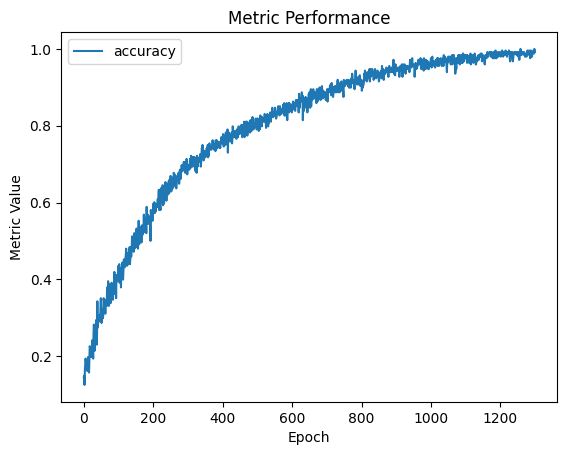

In [54]:
# plot metrics performance on both training and validation in the same plot
import matplotlib.pyplot as plt

# Create the plot
plt.plot(r.history["accuracy"], label='accuracy')
# plt.plot(r.history["val_accuracy"], label='val_accuracy')

# Add labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Metric Performance')
plt.legend()

# Show the plot
plt.show()

In [55]:
k=model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 0.6282 - accuracy: 0.8333


In [56]:
y_predicted=model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
df_y_predicted=pd.DataFrame(y_predicted)
df_y_predicted

1/1 [==============================] - 0s 51ms/step


0         1             2         3         4         5  \
0   0.943977  0.000041  1.741653e-03  0.677331  0.080167  0.000835   
1   0.853669  0.000301  1.336977e-03  0.439947  0.002470  0.001434   
2   0.973255  0.000104  2.875775e-03  0.075002  0.006486  0.014976   
3   0.007797  0.889689  1.353478e-07  0.020597  0.170820  0.981830   
4   0.000381  0.996244  1.332099e-05  0.000706  0.043415  0.998997   
5   0.001101  0.027465  1.169004e-02  0.104339  0.001624  0.023511   
6   0.005658  0.013647  9.983964e-01  0.002976  0.000083  0.000079   
7   0.101410  0.000799  9.844035e-01  0.215427  0.001144  0.000020   
8   0.022023  0.001079  9.998386e-01  0.237840  0.000005  0.000063   
9   0.291881  0.000048  2.590129e-03  0.940237  0.005538  0.000216   
10  0.262339  0.000936  2.478750e-02  0.761620  0.000697  0.000666   
11  0.471386  0.000088  2.570769e-02  0.979521  0.000267  0.000143   
12  0.010588  0.269359  8.991748e-05  0.003358  0.996409  0.056701   
13  0.458266  0.022804  7.453320e-05  0.011537  0.999984  0.002213   
14  0.427935  0.005543  4.316700e-03  0.006636  0.999423  0.004389   
15  0.012668  0.540415  1.578804e-05  0.006952  0.019554  0.977233   
16  0.027452  0.041140  7.998696e-06  0.099731  0.056174  0.751089   
17  0.067557  0.010129  1.292856e-05  0.126921  0.043901  0.319536   
18  0.014558  0.000090  9.761833e-02  0.827193  0.000521  0.000013   
19  0.000922  0.000076  9.866318e-01  0.595442  0.000095  0.000002   
20  0.000765  0.016669  9.487708e-01  0.486683  0.000685  0.000041   
21  0.014825  0.001477  1.386708e-02  0.016723  0.006098  0.002296   
22  0.008741  0.001248  7.987681e-03  0.429984  0.001432  0.003555   
23  0.057027  0.010138  5.740731e-01  0.034594  0.002919  0.006685   
24  0.205331  0.041202  2.248653e-07  0.097237  0.006377  0.718748   
25  0.275726  0.008901  5.884018e-04  0.079594  0.000488  0.389383   
26  0.382009  0.026949  4.721892e-06  0.195133  0.001745  0.400012   
27  0.000356  0.066659  1.661407e-02  0.064224  0.338933  0.002451   
28  0.116525  0.001244  5.939496e-04  0.001327  0.003188  0.075326   
29  0.196788  0.003294  3.700819e-05  0.127541  0.002973  0.083229   

               6         7         8         9  
0   1.485886e-05  0.046222  0.341225  0.021121  
1   5.647811e-05  0.340445  0.124285  0.141646  
2   2.530848e-08  0.040797  0.653211  0.204784  
3   1.598990e-07  0.039865  0.914009  0.132970  
4   1.307515e-09  0.032832  0.952465  0.036274  
5   1.168269e-02  0.562283  0.043289  0.007800  
6   1.949120e-01  0.607662  0.002851  0.069736  
7   6.434600e-01  0.420795  0.001237  0.035168  
8   5.006093e-02  0.132291  0.001922  0.018206  
9   1.161226e-01  0.065379  0.006967  0.122791  
10  1.966517e-02  0.189259  0.015002  0.154579  
11  1.079264e-03  0.022332  0.057041  0.109345  
12  1.358407e-06  0.009313  0.701202  0.002430  
13  2.315860e-05  0.012633  0.461150  0.000243  
14  3.503536e-04  0.088437  0.043729  0.002595  
15  7.561957e-08  0.042618  0.712108  0.081238  
16  4.087181e-06  0.109820  0.665313  0.017389  
17  7.670106e-06  0.276519  0.590156  0.130251  
18  9.997727e-01  0.740717  0.000133  0.164186  
19  9.995375e-01  0.874059  0.000156  0.045092  
20  9.955671e-01  0.869353  0.000200  0.027463  
21  1.448212e-02  0.649610  0.060431  0.100164  
22  1.543519e-02  0.622750  0.045457  0.033075  
23  4.288695e-03  0.724092  0.029368  0.010267  
24  8.888844e-08  0.023320  0.968268  0.662365  
25  2.296473e-06  0.070692  0.606423  0.300991  
26  2.884543e-07  0.078725  0.833917  0.599406  
27  1.066957e-01  0.653126  0.029045  0.028368  
28  2.208867e-05  0.584951  0.259494  0.902930  
29  9.933237e-06  0.290695  0.391586  0.656255

In [57]:
if cam=="side":   
    print(cam)
    import pandas as pd

    # Assuming your DataFrame is called df
    num_rows = df_y_predicted.shape[0]  # Get the number of rows
    num_groups = num_rows // 3  # Calculate the number of groups

    # Create an empty DataFrame to store the average values
    averages_df = pd.DataFrame()

    # Iterate over each column in the original DataFrame
    for column in df_y_predicted.columns:
        # Calculate the averages for each group of 3 rows
        averages = df_y_predicted[column].rolling(3).mean().iloc[2::3]

        # Append the averages to the new DataFrame
        averages_df[column] = averages

    # Print the DataFrame with the average values

    averages_df=averages_df.reset_index()
    averages_df=averages_df.iloc[:, 1:]
    averages_df

if cam=="front":
    print(cam)
    averages_df=df_y_predicted
    averages_df
    
    

side


In [58]:
averages_df

0         1         2         3         4         5             6  \
0  0.923633  0.000149  0.001985  0.397427  0.029707  0.005748  2.378743e-05   
1  0.003093  0.637799  0.003901  0.041881  0.071953  0.668112  3.894285e-03   
2  0.043030  0.005175  0.994213  0.152081  0.000411  0.000054  2.961443e-01   
3  0.341869  0.000357  0.017695  0.893793  0.002167  0.000341  4.562233e-02   
4  0.298930  0.099235  0.001494  0.007177  0.998605  0.021101  1.249569e-04   
5  0.035892  0.197228  0.000012  0.077868  0.039876  0.682619  3.944302e-06   
6  0.005415  0.005612  0.677674  0.636439  0.000434  0.000019  9.982924e-01   
7  0.026864  0.004288  0.198643  0.160434  0.003483  0.004179  1.140200e-02   
8  0.287689  0.025684  0.000198  0.123988  0.002870  0.502714  8.912720e-07   
9  0.104557  0.023732  0.005748  0.064364  0.115031  0.053669  3.557589e-02   

          7         8         9  
0  0.142488  0.372907  0.122517  
1  0.211660  0.636588  0.059015  
2  0.386916  0.002003  0.041037  
3  0.092323  0.026337  0.128905  
4  0.036794  0.402027  0.001756  
5  0.142986  0.655859  0.076292  
6  0.828043  0.000163  0.078914  
7  0.665484  0.045085  0.047836  
8  0.057579  0.802869  0.520921  
9  0.509591  0.226708  0.529185

predicted_labels [0, 5, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0.9236331979433695, 0.6377993151545525, 0.994212826093038, 0.8937925895055135, 0.9986054499944051, 0.682619313398997, 0.9982924262682596, 0.6654839913050333, 0.8028692404429117, 0.529184540733695]
******************************************
Accuracy of the model for test set:  0.8126492890839774


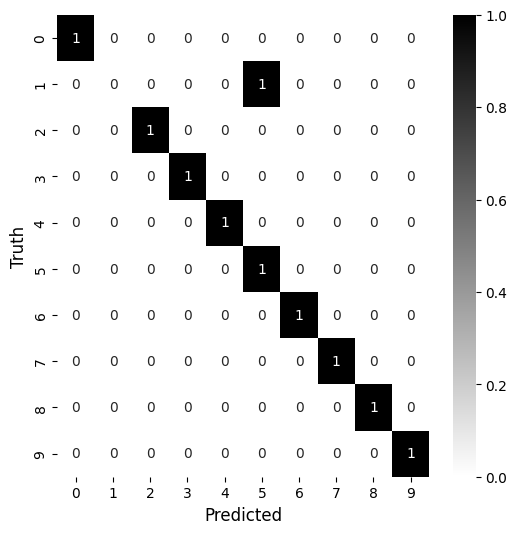

In [59]:
averages_array=averages_df.to_numpy()
y_predicted_labels = [np.argmax(i) for i in averages_array]
print('predicted_labels',y_predicted_labels)

idx=0
acc_arr=[]
for i in averages_array:
    ## accuracy for identifyng the actual person
    acc=i[idx]
    #print(acc)
    acc_arr.append(acc)
    idx=idx+1
print(idx)
print(acc_arr)
avg = np.average(acc_arr)
print('******************************************')
print("Accuracy of the model for test set: ",avg)

import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], predictions=y_predicted_labels)
plt.figure(figsize=(6, 6))

# Invert the colors and use a suitable color map for printing
sn.heatmap(cm, annot=True, fmt='d', cmap='binary')

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Truth', fontsize=12)
plt.show()



In [60]:
import os

if cam == "side":
    base_filename = 'model/model_results_side'
elif cam == "front":
    base_filename = 'model/model_results_front'
    
filename_ext = base_filename + '.pkl'

if os.path.exists(filename_ext):
    counter = 1
    while True:
        new_filename_ext = f"{base_filename}_{counter}.pkl"
        if not os.path.exists(new_filename_ext):
            filename_ext = new_filename_ext
            break
        counter += 1

pickle.dump(model, open(filename_ext, 'wb'))
print(filename_ext)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-07-24 15:15:05       103696
config.json                                    2023-07-24 15:15:05         1553
metadata.json                                  2023-07-24 15:15:05           64
model/model_results_side.pkl


In [61]:
## Load model

In [62]:
cam='side'
filename='model/model_results_{}.pkl'.format(cam)
# load the model from disk
model = pickle.load(open(filename, 'rb'))
print(filename)


Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-07-24 15:15:04       103696
config.json                                    2023-07-24 15:15:04         1553
metadata.json                                  2023-07-24 15:15:04           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......flatten
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
model/model_results_side.pkl


0:chathura
1:hasitha
2:yohan
3:ravindu
4:geemanthi
5:jayasanka
6:derek
7:nirmana
8:dasith
9:bimsara

## predict

In [ ]:
import pickle
import ipywidgets as widgets
from IPython.display import display
from fileupload import FileUploadWidget

def handle_upload(change):
    uploaded_file = change.new
    if uploaded_file:
        filename = uploaded_file.name
        with open(filename, 'wb') as f:
            f.write(uploaded_file.data)
        model = pickle.load(open(filename, 'rb'))
        # Use the loaded model as needed
        print("Model loaded successfully:", filename)

file_upload = FileUploadWidget()
file_upload.observe(handle_upload, names='data')
display(file_upload)

In [ ]:
#direction='back'       # right / left / front / back
fps=30
#cond='bag'          # normal / angle  / coat / helmet / bag

name_list_eval=['chathura','hasitha','yohan','geemanthi','jayasanka']

In [ ]:
import os
import csv
import pandas as pd

if cam=='side':
    direction=['right','left']
elif cam=='front':
    direction=['front','back']

cond = ['normal', 'angle', 'coat', 'helmet', 'bag']

# Define the path to the Excel file
excel_file_path = '/home/cbk/fyp/Prediction/results/results_{}_{}.xlsx'.format(fps, cam)

# Define column names for the DataFrame
column_names = ['Name', 'Vid_No', 'fps', 'cam', 'direction', 'condition','rank in probability order of identification', 'Accuracy(%)']

# Check if the Excel file already exists
if os.path.exists(excel_file_path):
    # Load the existing DataFrame from the Excel file
    df_results = pd.read_excel(excel_file_path)
else:
    # Create an empty DataFrame if the file doesn't exist
    df_results = pd.DataFrame(columns=column_names)

for d in direction:
    for condition in cond:
        for name in name_list_eval:
            for vid_no in range(1, 12):
                file_path = '/home/cbk/fyp/Prediction/valid_feature_vector/fps_{}/{}/{}/FV_{}_{}_{}.pkl'.format(fps, cam, condition, name, d, vid_no)
                if not os.path.exists(file_path):
                    continue

                temp_3 = open(file_path, 'rb')
                idx = name_list.index(name)
                df_pre = pickle.load(temp_3)
                df_pre = df_pre.assign(Label=idx)
                y = df_pre.iloc[:, -1:]

                temp_3.close()
                print(name, vid_no, condition, d, "Actual ", idx)

                df_pre = df_pre.drop(df_pre.iloc[:, -1:], axis=1)
                df_eval = df_pre
                X = df_eval

                a = model.evaluate(X, y)
                l = model.predict(X)

                df_l = pd.DataFrame(l)
                column_averages = df_l.mean()
                # print(df_l)
                print(column_averages)

                predicted_label = np.argmax(column_averages)
                print("predicted_label", predicted_label)

                ranked_probabilities = column_averages.rank(ascending=False, method='min')
                print(ranked_probabilities[idx], column_averages[idx])

                if predicted_label == idx:
                    # actual label prediction accuracy
                    act_accuracy = "{:.3f}".format(column_averages[idx])

                    y_predicted_eval = model.predict(X)
                    y_predicted_labels_eval = [np.argmax(j) for j in y_predicted_eval]

                    # y_predicted_labels = [np.argmax(i) for i in averages_array]

                    count = y_predicted_labels_eval.count(idx)
                    total_labels = len(y_predicted_labels_eval)
                    accuracy = count / total_labels
                    accuracy_percentage = accuracy

                    # Append the results to the DataFrame
                    df_results = df_results.append(
                        {
                            'Name': name,
                            'Vid_No': vid_no,
                            'fps': fps,
                            'cam': cam,
                            'direction': d,  # Use the specific direction value
                            'condition': condition,
                            'rank in probability order of identification': str(ranked_probabilities[idx]),
                            'Accuracy(%)': act_accuracy
                        },
                        ignore_index=True
                    )

                    print(y_predicted_labels_eval, idx)

                    print(f"Accuracy: {accuracy_percentage:.2f}%")
                    print("Evaluate Accuracy:", a[1])
                    print("Accuracy Correct way: ", act_accuracy)
                else:
                    df_results = df_results.append(
                        {
                            'Name': name,
                            'Vid_No': vid_no,
                            'fps': fps,
                            'cam': cam,
                            'direction': d,  # Use the specific direction value
                            'condition': condition,
                            'rank in probability order of identification': str(ranked_probabilities[idx]) + "   ,(" + str(
                                column_averages[idx]) + " )",
                            'Accuracy(%)': '0'
                        },
                        ignore_index=True
                    )

                print("********************")

# Save the updated DataFrame to the Excel file
df_results.to_excel(excel_file_path, index=False)


import openpyxl

# Load the existing Excel file
workbook = openpyxl.load_workbook(excel_file_path)

# Select the active sheet
sheet = workbook.active

# Find the last row in the sheet
last_row = sheet.max_row

# Specify the text you want to add
text_to_add_1 = str(filename_ext)
t2="Training accuracy :"+str(train[1])
t3="Accuracy of the model for test set: "+str(avg)

# Add the text to the last row
sheet.cell(row=last_row+1, column=1).value = text_to_add_1
sheet.cell(row=last_row+2, column=1).value = t2
sheet.cell(row=last_row+3, column=1).value = t3

# Save the modified workbook
workbook.save(excel_file_path)